<a href="https://colab.research.google.com/github/Vineet2107/EEG_Pipeline/blob/main/Sequential_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D, Layer
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


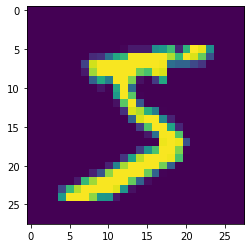

In [5]:
plt.imshow(x_train[0])

In [6]:
print(x_train[0].shape)
x_train=x_train[..., np.newaxis]
print(x_train[0].shape)

(28, 28)
(28, 28, 1)


In [9]:
model = tf.keras.Sequential()
model.add(Conv2D(32, 3,strides=(2,2), activation = "relu",input_shape=(28, 28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [20]:
checkpoint = ModelCheckpoint('my_model', save_weights_only=True, save_best_only=True, monitor='val_loss')

In [21]:

history= model.fit(x_train, y_train, batch_size=128, epochs=10, callbacks=[checkpoint])

Epoch 1/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0147 - acc: 0.9950
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0099 - acc: 0.9969
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0104 - acc: 0.9966
Epoch 4/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0084 - acc: 0.9972
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0084 - acc: 0.9972
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0095 - acc: 0.9966
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0090 - acc: 0.9969
Epoch 8/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0099 - acc: 0.9967
Epoch 9/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0053 - acc: 0.9983
Epoch 10/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0051 - acc: 0.9982


In [22]:
for i in range(8):
  print(model.layers[i].output)



KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 32), dtype=tf.float32, name=None), name='conv2d_3/Relu:0', description="created by layer 'conv2d_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 6, 6, 32), dtype=tf.float32, name=None), name='max_pooling2d_2/MaxPool:0', description="created by layer 'max_pooling2d_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 32), dtype=tf.float32, name=None), name='conv2d_4/Relu:0', description="created by layer 'conv2d_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2, 32), dtype=tf.float32, name=None), name='conv2d_5/Relu:0', description="created by layer 'conv2d_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 32), dtype=tf.float32, name=None), name='max_pooling2d_3/MaxPool:0', description="created by layer 'max_pooling2d_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")
KerasTensor(type_spec=TensorSpec(shape=(N